In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("/content/UpdatedResumeDataSet.csv.zip")

In [19]:
df.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [20]:
df.shape

(962, 2)

In [21]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


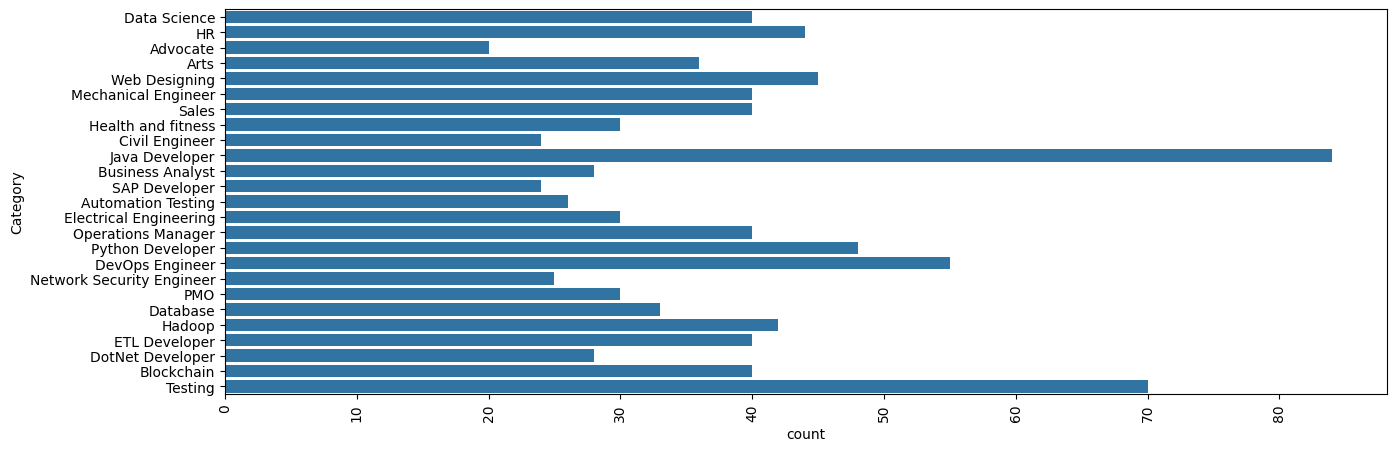

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [23]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [24]:
df['Category'][0]

'Data Science'

In [25]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [27]:
import re
import string

def clean_resume(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove retweet and cc
    text = re.sub(r'\b(RT|cc)\b', '', text)

    # Remove hashtags and mentions
    text = re.sub(r'[@#]\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove non-ASCII characters (e.g., emojis)
    text = text.encode('ascii', 'ignore').decode()

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text
cleanResume("My RE$#$eume is &*^& 98")



'My RE is 98'

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load your dataset with resume texts and categories
df = pd.read_csv('UpdatedResumeDataSet.csv.zip')  # 'Resume', 'Category' columns

# Clean resumes
df['cleaned'] = df['Resume'].apply(clean_resume)

# Vectorize text
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X = tfidf.fit_transform(df['cleaned'])

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['Category'])

# Train classifier
clf = RandomForestClassifier()
clf.fit(X, y)

# Save models
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(le, open('label_encoder.pkl', 'wb'))
pickle.dump(clf, open('model.pkl', 'wb'))
